# **Simple Linear Regression**
## Predicting End Semester Performance

The notebook uses the data set of student's performance, and attendance.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import math

df = pd.read_csv('AttendanceMarks.csv')
df.head()


,Attendance,MSE,ESE
0,70,10,42
1,92,7,39
2,67,3,32
3,82,16,50
4,80,9,44


In [2]:
df.describe()

,Attendance,MSE,ESE
count,73.000000,73.000000,73.000000
mean,81.698630,9.780822,46.630137
std,9.506847,3.047069,6.617542
min,62.000000,3.000000,32.000000
25%,75.000000,8.000000,42.000000
50%,80.000000,10.000000,47.000000
75%,90.000000,11.000000,50.000000
max,98.000000,17.000000,64.000000


**Task** - Correlation Analysis

In [3]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Attendance,MSE,ESE
Attendance,1.000000,-0.080943,-0.109972
MSE,-0.080943,1.000000,0.751530
ESE,-0.109972,0.751530,1.000000


/home/kiran/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MSE', ylabel='ESE'>

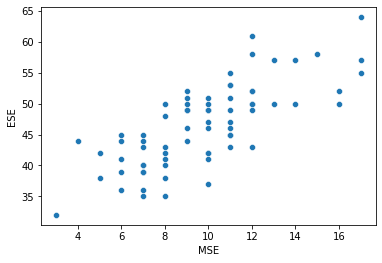

In [4]:
X = df["MSE"]
y = df["ESE"]

sns.scatterplot(X ,y)


**Task** - Pre-Processing

In [5]:
endog = df['ESE']
exog = sm.add_constant(df[['MSE']])
print(exog)

    const  MSE
0     1.0   10
1     1.0    7
2     1.0    3
3     1.0   16
4     1.0    9
..    ...  ...
68    1.0   10
69    1.0    8
70    1.0    9
71    1.0   11
72    1.0   12

[73 rows x 2 columns]


**Task** - Building the model.

In [6]:
mod = sm.OLS(endog, exog)
results = mod.fit()
print (results.summary())



                            OLS Regression Results                            
Dep. Variable:                    ESE   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     92.14
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           1.85e-14
Time:                        11:35:51   Log-Likelihood:                -210.66
No. Observations:                  73   AIC:                             425.3
Df Residuals:                      71   BIC:                             429.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.6664      1.741     17.616      0.0

> 

**Task** - Calculating the error between Predicted values and Actual values.

In [7]:
def RSE(y_true, y_predicted):
   
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    RSS = np.sum(np.square(y_true - y_predicted))

    rse = math.sqrt(RSS / (len(y_true) - 2))
    return rse

In [8]:
rse= RSE(df['ESE'],results.predict())
print(rse)

4.396224549647786


**Task** - Intepreting the results of first model.

* The value R2 is **0.56**.

* The value RSE is **4.3.** on training data set with error of +/- 4.

/home/kiran/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attendance', ylabel='ESE'>

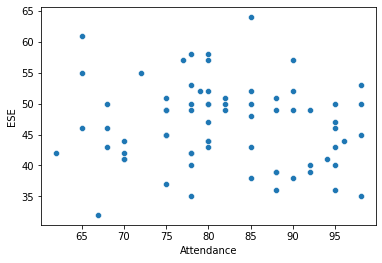

In [9]:
X1 = df["Attendance"]
y1 = df["ESE"]

sns.scatterplot(X1 ,y1)


In [10]:
endog1 = df['ESE']
exog1 = sm.add_constant(df[['Attendance']])
print(exog)

    const  MSE
0     1.0   10
1     1.0    7
2     1.0    3
3     1.0   16
4     1.0    9
..    ...  ...
68    1.0   10
69    1.0    8
70    1.0    9
71    1.0   11
72    1.0   12

[73 rows x 2 columns]


**Task** - Interpreting the results of the Second model.

The R2 value is **0.012**. 

Hence, in the context of this dataset, attendance is a bad predictor for end semester performance. 

In [11]:
# Fit and summarize OLS model
mod1 = sm.OLS(endog1, exog1)
results1 = mod1.fit()
print (results1.summary())

                            OLS Regression Results                            
Dep. Variable:                    ESE   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.8692
Date:                Thu, 08 Oct 2020   Prob (F-statistic):              0.354
Time:                        11:35:52   Log-Likelihood:                -240.58
No. Observations:                  73   AIC:                             485.2
Df Residuals:                      71   BIC:                             489.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.8841      6.753      7.831      0.0